In [4]:
import sys
import torch
a=torch.tensor([1,2,3])
print(sys.getsizeof(a))
print(a.element_size() * a.nelement())

b=torch.rand((4,4))
print(b)
print(b.repeat(2,1))
# import torch

# 创建一个张量
tensor = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# 将张量重复两次
# repeated_tensor = tensor.repeat(2)
# print(repeated_tensor)
# repeated_tensor = torch.nn.Parameter(repeated_tensor)
repeated_tensor = tensor.clone()
repeated_tensor[1] =1
# r2 = tensor/2 + tensor
# repeated_tensor = torch.cat((r2,repeated_tensor))
# repeated_tensor = torch.cat((tensor,repeated_tensor))

# repeated_tensor = torch.nn.Parameter(repeated_tensor)
# 假设有一个损失函数
loss = repeated_tensor.mean()

# 反向传播
loss.backward()

# 输出原张量的梯度
print(repeated_tensor.grad)
print(tensor.grad)



80
24
tensor([[0.9788, 0.2349, 0.9396, 0.5144],
        [0.8093, 0.5720, 0.6363, 0.4858],
        [0.2527, 0.9027, 0.6334, 0.4892],
        [0.2765, 0.2808, 0.9102, 0.6014]])
tensor([[0.9788, 0.2349, 0.9396, 0.5144],
        [0.8093, 0.5720, 0.6363, 0.4858],
        [0.2527, 0.9027, 0.6334, 0.4892],
        [0.2765, 0.2808, 0.9102, 0.6014],
        [0.9788, 0.2349, 0.9396, 0.5144],
        [0.8093, 0.5720, 0.6363, 0.4858],
        [0.2527, 0.9027, 0.6334, 0.4892],
        [0.2765, 0.2808, 0.9102, 0.6014]])
None
tensor([0.3333, 0.0000, 0.3333])


/tmp/ipykernel_3240356/8189349.py:33: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(repeated_tensor.grad)


: 

In [22]:
from PIL import Image,ImageFile

import numpy as np
image_path ="../datasets/dnerf/hook/test/r_000.png"
image_load = Image.open(image_path).convert("RGBA")
resized_image_PIL = image_load.resize((400,400))

# with Image.open(viewpoint_cam.image_path) as image_load:
# if self.use_background:
im_data = np.array(resized_image_PIL.convert("RGBA"))
norm_data = im_data / 255.0

image_render = "log/hook/useintergral/test/ours_10000/renders/00000.png"
image_load = Image.open(image_render).convert("RGB")
image_load = np.array(image_load)/255.0
image_2 = image_load * norm_data[:,:,:3] + (1-norm_data[:,:,3:4]) * 1
print(image_2)
# image_2.save("log/hook/useintergral/test/ours_10000/renders/00000_222.png")
# arr =  norm_data[:,:,:3] * norm_data[:, :, 3:4] + self.bg * (1 - norm_data[:, :, 3:4])
image_load = Image.fromarray(np.array(image_2*255.0, dtype=np.byte), "RGB")
image_load.save("log/hook/useintergral/test/ours_10000/renders/00000_222.png")

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [1]:
import math
print(math.exp(-8))
from scipy import integrate
import numpy as np

# 定义高斯函数
def gaussian(x):
    return np.exp(-0.5*x**2)/np.sqrt(2*np.pi)
def gaussian_1(x):
    return np.exp(-4*x**2)*2*np.sqrt(2)/np.sqrt(2*np.pi)

# 定义积分区间
a = -np.inf  # 积分下限
b = np.inf   # 积分上限

# 使用quad函数进行数值积分
result, error = integrate.quad(gaussian, a, b)

print("定积分结果:", result)
print("估计误差:", error)
# result, error = integrate.quad(gaussian_1, a/(2*np.sqrt(2)), b/(2*np.sqrt(2)))
result, error = integrate.quad(gaussian_1, a/(2*np.sqrt(2)), 0)

print("定积分结果:", result)
print("估计误差:", error)
a1 = 0.070565902
a2 = 1.5976

u=0.3
scale =1.0/164
# print(scale)
def mygaussian(x):

    return np.exp(-4*((x-u)/scale)**2)
# /np.sqrt(2*np.pi)
def Q(x):
    print(x)
    return (1-1/(1+math.exp(a1*x**3+a2*x)))

result, error = integrate.quad(mygaussian, 0, 1)
print(np.exp(-4))
print("定积分结果:", result)
print("估计误差:", error)
print(Q(0)/(2*np.sqrt(2))*np.sqrt(2*np.pi))
r = Q((1-2*np.sqrt(2))/4*np.sqrt(2))/(2*np.sqrt(2))
print(r)
def mQ(x):
    x = (x-u)*2*np.sqrt(2)/scale
    return Q(x)*scale*np.sqrt(np.pi)/2
print(mQ(1)-mQ(0))




0.00033546262790251185
定积分结果: 0.9999999999999998
估计误差: 1.0178191320905743e-08
定积分结果: 0.5000000000000001
估计误差: 2.0698358661636116e-11
0.01831563888873418
定积分结果: 8.600623224312812e-10
估计误差: 1.5930598071871984e-09
0
0.4431134627263789
-0.6464466094067264
0.09152598525739039
324.7034339208626


OverflowError: math range error

In [2]:
import torch
import numpy as np
# u = torch.rand((5,1))
# scale = torch.rand((5,1))
u=torch.tensor([0])
scale=torch.tensor([1/207])
print(scale)
def outputfunc(x):
    distance = x-u
    return torch.exp(-4*(distance/scale)**2)
print(1/0.0056)
def Q(x:torch.Tensor):
    # print(x)
    a1 = torch.Tensor([0.070565902])
    a2 = torch.Tensor([1.5976]) 
    # print(a1*x**3+a2*x)
    # print(1/(1+torch.exp(a1*x**3+a2*x)))
    # print(torch.sigmoid(-(a1*x**3+a2*x)))
    # return 1-torch.sigmoid(a1*x**3+a2*x)
    return (1-1/(1+torch.exp(a1*x**3+a2*x)))

def get_integral():
    p1 = Q(2*np.sqrt(2)*(1-u)/scale)
    p2 = Q(2*np.sqrt(2)*(-u)/scale)
    # print(p1,p2)
    return scale*np.sqrt(np.pi)/2*(p1-p2)

print("intergral",get_integral())
print(u,scale)
print(np.linspace(0.1,1,10))

a= torch.tensor([torch.inf])
print(a*.5)
print(a)
print(np.exp(-1/2))
print(np.exp(-2))

tensor([0.0048])
178.57142857142858
intergral tensor([0.0021])
tensor([0]) tensor([0.0048])
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
tensor([inf])
tensor([inf])
0.6065306597126334
0.13533528323661267


In [17]:
import torch

# 创建一个张量并设置 requires_grad=True 以保留梯度
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# 对张量进行限制，将取值限制在 [1, 2] 的范围内
clamped_x = torch.clamp(x, min=1, max=2)

# 定义一个损失函数
loss = torch.sum(clamped_x)

# 计算梯度
loss.backward()

# 输出原始张量的梯度和限制后张量的梯度
print("原始张量的梯度：", x.grad)
print("限制后张量的梯度：", clamped_x.grad)



原始张量的梯度： tensor([1., 1., 0.])
限制后张量的梯度： None


/tmp/ipykernel_1588187/1445299196.py:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print("限制后张量的梯度：", clamped_x.grad)


In [ ]:
from PIL import Image,ImageFile

Image.open(viewpoint_cam.image_path).convert("RGB")

In [10]:
import nvdiffrast.torch
import torch
tex = torch.rand((1,1, 256, 3),device="cuda")
# print(tex)
interp =nvdiffrast.torch.texture(
            grid,
            coords,
            mip_level_bias=levels,
            boundary_mode="clamp",
            # max_mip_level=7,
        )  # 3xNx1xC

mip_stack = nvdiffrast.torch.texture_construct_mip(tex,max_mip_level=7)
print(mip_stack.tensor)

AttributeError: 'nvdiffrast_plugin.TextureMipWrapper' object has no attribute 'tensor'

In [78]:
import torch
# from torchvision.nn import functional as F
import nvdiffrast.torch

# 创建一个张量 [H, W]
input = torch.randn(1,1,4, 4, requires_grad=True,device="cuda")
print(input.shape)
coords = torch.tensor([[[0,0.5],[0.5,0.5],[0,0],[1,1]]],dtype=torch.float32,device="cuda").unsqueeze(0)
print("coords",coords.shape)

# 使用 torch.nn.functional.interpolate() 进行缩略图采样
output1 = torch.nn.functional.interpolate(input, size=(4, 2), mode='bilinear')
output2 = torch.nn.functional.interpolate(input, size=(4, 1), mode='bilinear')
print(output1.shape)
print(output2.shape)
# mip_list = [output1,output2]
levels = torch.tensor([0,1,1,1],dtype=torch.float32).reshape(1,1,4).to("cuda")
print("levels",levels.shape)
input_ = input.permute(0,2,3,1).contiguous()
output1 = output1.permute(0,2,3,1).contiguous()
output2 = output2.permute(0,2,3,1).contiguous()
print(input_.shape,output1.shape,output2.shape)
mip_stack = nvdiffrast.torch.texture_construct_mip(input_,max_mip_level=2)
mip_list = [output1,output2]
input_=torch.zeros_like(input_)
print(input_)
print(output1)
interp =nvdiffrast.torch.texture(
            input_,
            coords,
            mip_level_bias=levels,
            mip=mip_list,
            boundary_mode="clamp",
            max_mip_level=2,
        )  # 3xNx1xC
print(interp)
# 使用 torchvision.transforms.functional.interpolate() 进行缩略图采样
# output = F.interpolate(input, size=(256, 256), mode='bilinear', align_corners=False)

# 启用梯度回传
# output.requires_grad = True

# 计算损失
# loss = torch.nn.MSELoss()(output, target)
loss = interp.sum(dim=1).mean()

# 反向传播
loss.backward()
print(input.grad)

test = torch.randn(1,1,2, 2, requires_grad=True)
loss2 = (test*2).sum(dim=1).mean()
loss2.backward()
print(test.grad)
# 梯度将回传到 input 张量中

torch.Size([1, 1, 4, 4])
coords torch.Size([1, 1, 4, 2])
torch.Size([1, 1, 4, 2])
torch.Size([1, 1, 4, 1])
levels torch.Size([1, 1, 4])
torch.Size([1, 4, 4, 1]) torch.Size([1, 4, 2, 1]) torch.Size([1, 4, 1, 1])
tensor([[[[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]],

         [[0.],
          [0.],
          [0.],
          [0.]]]], device='cuda:0')
tensor([[[[ 0.2325],
          [-0.2323]],

         [[-0.1842],
          [-0.2767]],

         [[ 1.2788],
          [-0.6970]],

         [[ 0.0374],
          [ 0.7702]]]], device='cuda:0', grad_fn=<PermuteBackward0>)


RuntimeError: mip level size mismatch in custom mip stack

tensor([[0.8571],
        [0.8571],
        [1.1429],
        [1.1429],
        [1.1429],
        [1.1429],
        [0.8571],
        [0.8571]])


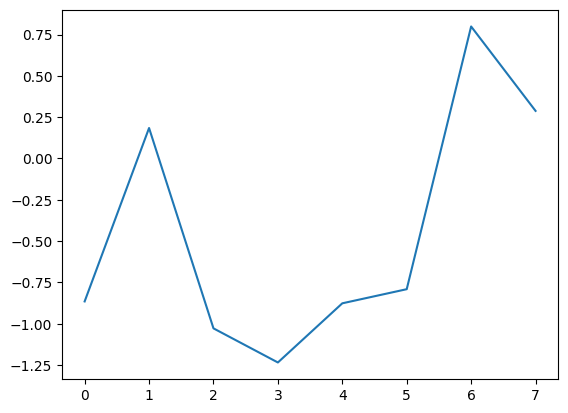

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

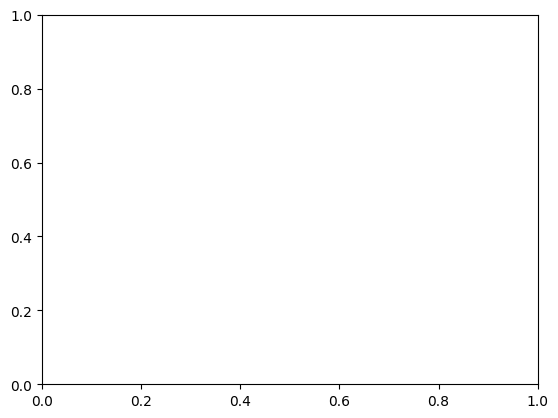

In [27]:
import torch
import torch.nn.functional as F
H =8
W =1
# 假设你的原始张量为 input_tensor，大小为 [H, W]
input_tensor = torch.randn(H, W,requires_grad=True)

# 指定 downsample 的比例
scale_factor = 0.5  # 可以根据实际情况进行调整

# 使用 torch.nn.functional.interpolate() 对指定维度进行 downsample，并保留输入的 H 和 W
downsampled_tensor = F.interpolate(input_tensor.unsqueeze(0).unsqueeze(0), size=(int(H/2),W), mode='bilinear', align_corners=False).squeeze(0).squeeze(0)
# print(input_tensor)
downsampled_tensor_2 = F.interpolate(downsampled_tensor.unsqueeze(0).unsqueeze(0), size=(int(H/4),W), mode='bilinear', align_corners=False).squeeze(0).squeeze(0)
upsampled_tensor_2 = F.interpolate(downsampled_tensor_2.unsqueeze(0).unsqueeze(0), size=(H,W), mode='bilinear', align_corners=True).squeeze(0).squeeze(0)
upsampled_tensor = F.interpolate(downsampled_tensor.unsqueeze(0).unsqueeze(0), size=(H,W), mode='bilinear', align_corners=False).squeeze(0).squeeze(0)
# print(downsampled_tensor)
# print(upsampled_tensor)
# print(downsampled_tensor_2)
# print(upsampled_tensor_2)
# 输出 downsample 后的张量的形状
# print("Downsampled tensor shape:", downsampled_tensor.shape)
loss = upsampled_tensor.sum()
loss.backward()
print(input_tensor.grad)
#将张量作图展示
import matplotlib.pyplot as plt
x = torch.arange(0, H, 1)
plt.plot(x, input_tensor.detach())
# plt.imshow(input_tensor)
plt.show()
x_d = torch.arange(0, H/2, 1)
plt.plot(x_d, downsampled_tensor)
plt.show()
x_d2 = torch.arange(0, H/4, 1)
plt.plot(x_d2, downsampled_tensor_2)
plt.show()
plt.plot(x, upsampled_tensor)
plt.show()
plt.plot(x,upsampled_tensor_2)
plt.show()

In [3]:
import numpy as np
print(np.arctan(67.55753/ 347.52295))

d={"1":2}
for a in d:
    print(a)
import torch
a= torch.rand((4,4))
print(a)
b=a.clone()
b[0,0]=1
print(a)
print(b)

c= torch.tensor([0,1],dtype=bool)
print(c)
print((~c).sum())

0.19200260886816767
1
tensor([[0.2954, 0.4102, 0.8638, 0.8579],
        [0.3811, 0.1011, 0.5388, 0.2139],
        [0.9253, 0.1837, 0.6077, 0.8928],
        [0.6531, 0.8487, 0.1472, 0.3233]])
tensor([[0.2954, 0.4102, 0.8638, 0.8579],
        [0.3811, 0.1011, 0.5388, 0.2139],
        [0.9253, 0.1837, 0.6077, 0.8928],
        [0.6531, 0.8487, 0.1472, 0.3233]])
tensor([[1.0000, 0.4102, 0.8638, 0.8579],
        [0.3811, 0.1011, 0.5388, 0.2139],
        [0.9253, 0.1837, 0.6077, 0.8928],
        [0.6531, 0.8487, 0.1472, 0.3233]])
tensor([False,  True])
tensor(1)


In [9]:
import torch
a = torch.arange(9, dtype=torch.float) - 4


val = torch.linalg.vector_norm(a, ord=2)
print(a,val)

tensor([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]) tensor(7.7460)


In [11]:
import torch
from torch.utils.data import Dataset

# 定义一个简单的数据集类
class SimpleDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

# 创建一个数据集实例
my_data = [1, 2, 3, 4, 5]
my_dataset = SimpleDataset(my_data)

# 直接使用 for 循环遍历数据集
for item in my_dataset:
    print("Item:", item)
    item +=1
    
for item in my_dataset:
    print("Item:", item)

Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5


/media/yan1/yjb/temp/ipykernel_910891/2298406344.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  beta = sigma* (np.math.gamma(1/alpha)/np.math.gamma(3/alpha))**(1/2)
/media/yan1/yjb/temp/ipykernel_910891/2298406344.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (alpha / (2 * beta* np.math.gamma(1/alpha))) * np.exp(-(np.abs(x) / beta) ** alpha)


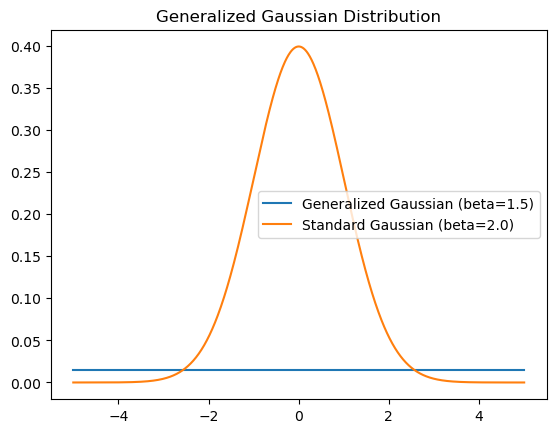

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 定义广义高斯分布的概率密度函数
def generalized_gaussian(x, alpha, sigma):
    beta = sigma* (np.math.gamma(1/alpha)/np.math.gamma(3/alpha))**(1/2)
    return (alpha / (2 * beta* np.math.gamma(1/alpha))) * np.exp(-(np.abs(x) / beta) ** alpha)

# 参数设置
alpha = 10.0  # 尺度参数
# beta_slow = 2  # 形状参数，下降较慢.越大尾部下降越快
sigma=20.0
beta_standard = 2.0  # 形状参数，标准高斯分布

# 生成数据
x = np.linspace(-5, 5, 1000)
pdf_slow = generalized_gaussian(x, alpha, sigma)
pdf_standard = norm.pdf(x, loc=0, scale=1)  # 标准高斯分布 PDF

# 绘制图形
plt.plot(x, pdf_slow, label='Generalized Gaussian (beta=1.5)')
plt.plot(x, pdf_standard, label='Standard Gaussian (beta=2.0)')
plt.title('Generalized Gaussian Distribution')
plt.legend()
plt.show()


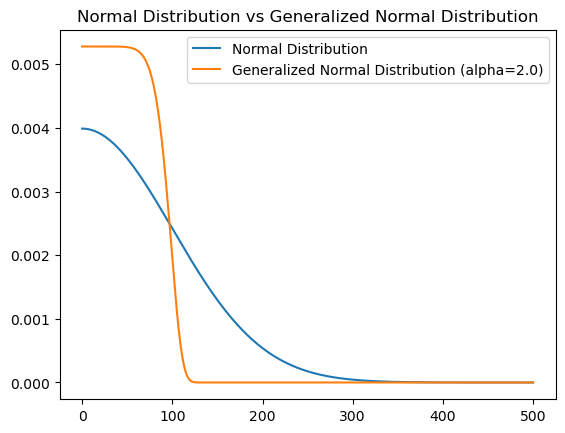

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, gennorm

# 生成数据
x = np.linspace(0, 500, 1000)

# 正态分布的参数
mu = 0  # 均值
sigma = 100  # 标准差
normal_distribution = norm.pdf(x, mu, sigma)

# 广义正态分布的参数
alpha = 9.0  # 形状参数
gnd_distribution = gennorm.pdf(x, alpha, loc=mu, scale=sigma)

# 绘制图形
plt.plot(x, normal_distribution, label='Normal Distribution')
plt.plot(x, gnd_distribution, label='Generalized Normal Distribution (alpha=2.0)')
plt.title('Normal Distribution vs Generalized Normal Distribution')
plt.legend()
plt.show()

/media/yan1/yjb/temp/ipykernel_910891/2966533496.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(a * (x - b)))


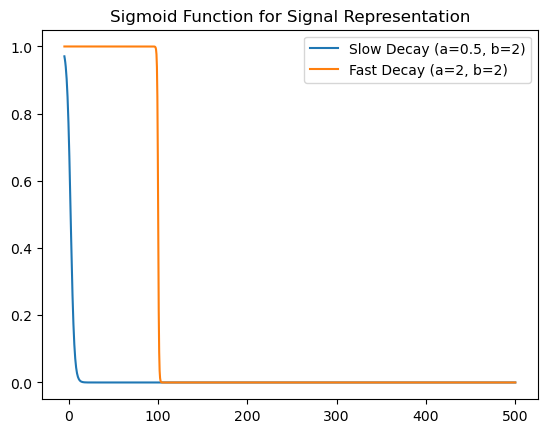

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, a=1, b=0):
    return 1 / (1 + np.exp(a * (x - b)))

# 生成数据
x = np.linspace(-5, 500, 1000)

# 使用不同的参数调整sigmoid函数
y_slow_decay = sigmoid(x, a=0.5, b=2)  # 较慢的衰减
y_fast_decay = sigmoid(x, a=2, b=100)   # 较快的衰减

# 绘制图形
plt.plot(x, y_slow_decay, label='Slow Decay (a=0.5, b=2)')
plt.plot(x, y_fast_decay, label='Fast Decay (a=2, b=2)')
plt.title('Sigmoid Function for Signal Representation')
plt.legend()
plt.show()

# 采用梯度下降的方法去估计sigmoid参数

sigmoid_model()
0.6537235953860757
tensor([0.9970])
0.7216594398491182
tensor([0.9888])
0.6734208459631883
tensor([0.9999])
0.6741236559642662
tensor([0.9993])
0.659734917348169
tensor([0.9998])
0.6274557223476844
tensor([0.9957])
0.7096226901910531
tensor([1.])
0.6357707921697775
tensor([1.0000])
0.6365245225978506
tensor([0.9821])
0.6036223602820149
tensor([0.9684])
0.6258366143346917
tensor([0.9993])
0.7233887987303629
tensor([0.9995])
0.6282666570362825
tensor([1.0000])
0.6485621741600169
tensor([0.9994])
0.7081506659012972
tensor([0.9999])
0.6182167602772747
tensor([0.9789])
0.6488267504904153
tensor([1.0000])
0.6665357750094704
tensor([1.0000])
0.701264382105245
tensor([0.9991])
0.6620420709573207
tensor([0.9832])
0.6949099842017881
tensor([1.0000])
0.674371849841253
tensor([0.9998])
0.6447485250748588
tensor([0.9978])
0.6767741719604935
tensor([0.9999])
0.7257789644463571
tensor([0.9999])
0.6625937863867942
tensor([1.0000])
0.6679706397254178
tensor([1.0000])
0.6812026780933315


0.6551968652344914
tensor([1.])
0.7012753225473987
tensor([0.9999])
0.653555580124445
tensor([0.9997])
0.638331135835559
tensor([0.9992])
0.6616819089068298
tensor([0.9817])
0.632051988174351
tensor([0.9991])
0.6683653507069937
tensor([0.9950])
0.688308692960613
tensor([0.9995])
0.6594765899830145
tensor([0.9939])
0.634383983051439
tensor([1.])
0.7053632636879099
tensor([0.9841])
0.6460680870870891
tensor([1.0000])
0.7022038479539882
tensor([0.9962])
0.6302920367340669
tensor([1.])
0.5929285590952387
tensor([0.9999])
0.6542555298215688
tensor([0.9930])
0.6433921974693197
tensor([0.9984])
0.6581117931824891
tensor([0.9862])
0.6429806945923826
tensor([0.9923])
0.6392143891440468
tensor([0.9999])
0.6396203226138937
tensor([0.9999])
0.6581847851543859
tensor([1.])
0.660557701326442
tensor([0.9913])
0.594071445844651
tensor([0.9986])
0.6469471805614085
tensor([0.9913])
0.6249947258178205
tensor([0.9998])
0.6370420567912575
tensor([0.9996])
0.6866713986094655
tensor([0.9995])
0.6989353771179

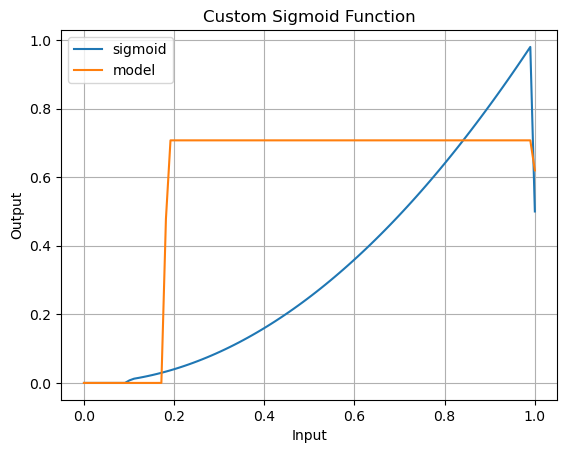

In [95]:
import numpy as np
import torch
class sigmoid_model(torch.nn.Module):
    def __init__(self):
        super(sigmoid_model,self).__init__()
        self.opcity = torch.nn.Parameter(torch.tensor([1.0]))
        self.duration =  torch.nn.Parameter(torch.tensor([1.0]))
        self.start = torch.nn.Parameter(torch.tensor([0.0]))
        # self.param3 = torch.nn.Parameter(torch.tensor([0.0]))
        # print(self.param1)
    
    def forward(self,x):
        # if x > self.param3
        # x = self.opcity / (1.0 + torch.exp(1000.0 * (x - torch.exp(self.duration))))/ (1 + torch.exp(-1000.0 * (x - torch.exp(self.start))))
        x = self.opcity / (1.0 + torch.exp(1000.0 * (x - self.duration)))/ (1 + torch.exp(-1000.0 * (x - self.start)))

        return x

def sigmoid(x, a=1000.0, b=0.0):
    return x**2 / (1 + torch.exp(a * (x - 1)))/ (1 + torch.exp(-a * (x - 0.1)))

# data_list = torch.tensor([1] *150 + [0]*50,dtype=float)
learning_rate = 1e-5

model = sigmoid_model()
print(model)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = torch.nn.L1Loss()
# criterion = l1loss
batch_size=100
for epoch_idx in range(1000):
    optimizer.zero_grad()  # 清零梯度
    # print(model.param1,model.param2)=
    # x_list = list(range(200))
    # print(x_list)
    # np.random.shuffle(x_list)
    # print(x_list)
    # x_data = torch.tensor(x_list,dtype=float,requires_grad=True)
    x_data = np.linspace(0,1,num=3000,dtype=float)
    np.random.shuffle(x_data)
    x_data = torch.tensor(x_data)
    x_data = x_data.reshape((-1,batch_size))
    # print(x_data.shape)
    for idx in range(x_data.shape[0]):

        y=model(x_data[idx])
        gt = sigmoid(x_data[idx])
        # print(y,gt)
        loss = criterion(y, gt)
        print(loss.item())
        loss.backward()
        # print(loss.grad)
        # print(optimizer.param_groups)
        # print(model.start.grad,model.duration.grad)
        print(model.opcity.grad)
        optimizer.step()
        optimizer.zero_grad()
        # print(model.start,model.duration) 
    # for x  in x_list:
    #     y = model(torch.tensor([x]))
    #     # print(data_list[x])
    #     # print(y.item())
    #     loss = criterion(y,data_list[x])
    #     print(y.item(),data_list[x].item(),loss.item())
    #     loss.backward()
    #     print(model.param1.grad,model.param2.grad)
    #     optimizer.step()
        # optimizer.zero_grad()
        # print(model.param1.grad)
        # exit()
print(model.start,model.duration)

x_values = np.linspace(0, 1, 100)
model_values = model(torch.tensor(x_values)).detach().numpy()
y_values = sigmoid(torch.tensor(x_values)).detach().numpy()

plt.plot(x_values, y_values,label="sigmoid")
plt.plot(x_values, model_values,label="model")
plt.title("Custom Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


/media/yan1/yjb/temp/ipykernel_960736/3191263209.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(a * (x - b))) / (1 + np.exp(-1 * (x - 1)))


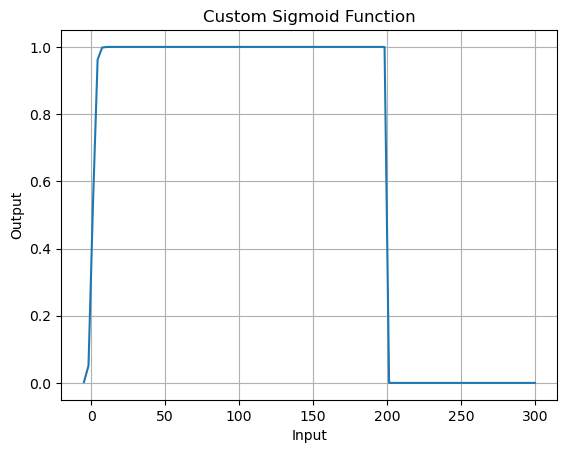

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def custom_sigmoid(x, a=100, b=200):
    return 1 / (1 + np.exp(a * (x - b))) / (1 + np.exp(-1 * (x - 1)))
    # return 0.5 * (1 + np.tanh(a * (x - b)))

x_values = np.linspace(-5, 300, 100)
y_values = custom_sigmoid(x_values)

plt.plot(x_values, y_values)
plt.title("Custom Sigmoid Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

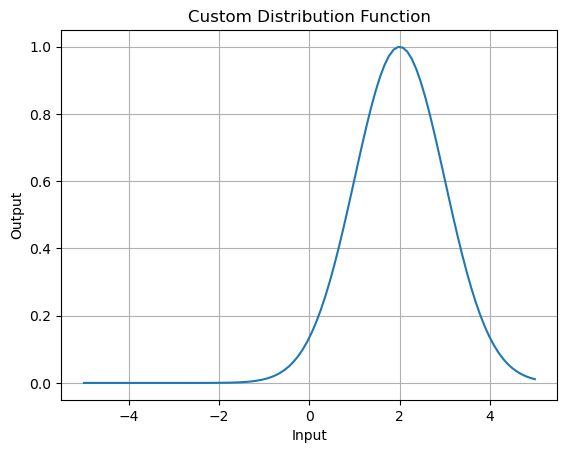

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def custom_distribution(x, center=0, width=1):
    return np.exp(-0.5 * ((x - center) / width)**2)

x_values = np.linspace(-5, 5, 100)
y_values = custom_distribution(x_values, center=2, width=1)

plt.plot(x_values, y_values)
plt.title("Custom Distribution Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True)
plt.show()

[[252 252 252 ... 252 253 253]
 [252 252 252 ... 253 253 253]
 [252 252 252 ... 253 253 253]
 ...
 [252 252 252 ... 255 255 255]
 [252 252 252 ... 255 255 255]
 [252 252 252 ... 255 255 255]]


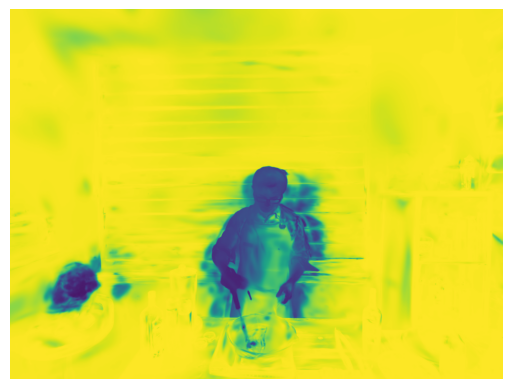

Color mapped image saved successfully.


In [1]:
import cv2
import matplotlib.pyplot as plt
# gray_image = cv2.imread('log/cook_spinach/notschedule_scalrereg8e-6_prealxyzf5k_d5k_allnoinf5k_hexdim32/test/ours_13500/renders_scale/00149.png', cv2.IMREAD_GRAYSCALE)

gray_image = cv2.imread('/amax/yjb/mygaussian/log/coffee/notschedule_scalrereg8e-6_prealxyzf10k_d10k_allnoinf10k_hexdim32/d5k/test/ours_27500/renders_scale/00100.png', cv2.IMREAD_GRAYSCALE)

# def grayscale_to_color(gray_image):
#     color_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
#     # cv2.imshow('Color Image', color_image)
#     cv2.imwrite('color_image.jpg', color_image)
#     return color_image
# grayscale_to_color(gray_image)
print(gray_image)
# gray_image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

color_mapped_image = cv2.applyColorMap(gray_image, cv2.COLORMAP_VIRIDIS)

# 可视化彩色映射后的图像
plt.imshow(cv2.cvtColor(color_mapped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 关闭坐标轴
plt.show()

# 保存彩色映射后的图像
cv2.imwrite('coffee_100_segment_color.jpg', color_mapped_image)
print("Color mapped image saved successfully.")

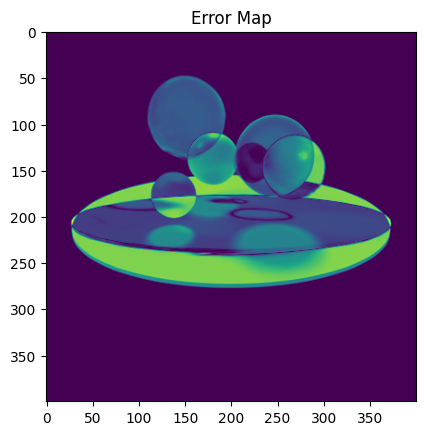

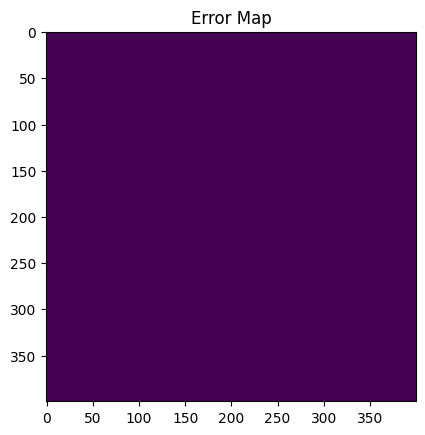

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.      

/tmp/ipykernel_3607209/3320909020.py:68: RuntimeWarning: divide by zero encountered in divide
  return 20 * np.log10(1.0 / np.sqrt(mse))


In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_error_map(image1, image2):
    # 将图像转换为灰度图
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # 计算绝对差异图
    error_map = np.abs(gray1.astype(np.float32) - gray2.astype(np.float32))

    return error_map

# 读取两张图像
# log/coffee/hexplane_t75_nosh_newdata_hexvt_vt
# 'log/ball/hex64128_resetop2k_notstd_minscale0.5/test/ours_10000/renders/00000.png'
image1 = cv2.imread('log/ball/hex64128_resetop2k_notstd_scalereg8e-6_mininterval0.5_nolrschedule/test/ours_19000/gt/00005.png')
# image1 = cv2.resize(image1,(1352,1014))
# 'log/coffee/hexplane_t150_nosh_newdata_exp4_dstd1e-4_normintergral_all_m1_1000static'
image2 = cv2.imread('log/ball/hex64128_resetop2k_notstd_scalereg8e-6_mininterval0.5_nolrschedule/test/ours_19000/renders/00000.png')

# image2 = cv2.imread('log/coffee/coarse2fine_hexmip_coarse25000/test/ours_6000/renders/00000.png')
image3 = cv2.imread('log/ball/hex64128_resetop2k_notstd_scalereg8e-6_mininterval0.5_nolrschedule/test/ours_19000/renders_xyz/00000.png')

# image1 = image1[:500,:]
# image2 = image2[:500,:]
# image3 = image3[:500,:]

# 计算误差图
error_map_1 = compute_error_map(image1, image3)
error_map_2 = compute_error_map(image2, image3)

# 绘制原始图像和误差图
# plt.subplot(131), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title('Image 1')
# plt.subplot(132), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title('Image 2')
# plt.subplot(133), 
# plt.subplot(121),
plt.imshow(error_map_1, cmap='viridis'), plt.title('Error Map')
plt.show()
# plt.subplot(122),
plt.imshow(error_map_2, cmap='viridis'), plt.title('Error Map')
plt.show()
#读取一个文件夹下的所有图片
import os


#读取文件夹下的所有图片
def read_images(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.png'):
            image = cv2.imread(os.path.join(folder_path, filename))
            images.append(image)
    return images
p1 = '../datasets/neural_3D/flame_steak/cam00/'
p2 = 'log/flame_steak/notschedule_scalereg8e-6_prealxyzf5k_d5k_nosintf5k_hexdim16/test/ours_4000/renders/'

def psnr(img1, img2):
    # print((img1 - img2)) ** 2
    # print(img1)
    # print(img2)
    mse = (((img1 - img2)) ** 2).reshape(img1.shape[0],-1).mean(axis=1, keepdims=True)
    print(mse)
    # print(mse.type)
    # .view(img1.shape[0], -1)
    # .mean(1, keepdim=True)
    return 20 * np.log10(1.0 / np.sqrt(mse))
# print(image1[:,:1000].shape)
print(psnr(image1, image2).mean()) #右侧对结果的影响太大了
# print(psnr(image2, image3))

In [15]:
import torch
w=1300
h=1000
depth = torch.FloatTensor(w, h).uniform_(0, 1)
ones = torch.ones(w, h )
x, y = torch.meshgrid(torch.arange(w), torch.arange(h))
print(x.shape)
c=torch.cat((x.unsqueeze(2), y.unsqueeze(2),depth.unsqueeze(2),ones.unsqueeze(2)), dim=2)
print(c)

torch.Size([1300, 1000])
tensor([[[0.0000e+00, 0.0000e+00, 6.0224e-01, 1.0000e+00],
         [0.0000e+00, 1.0000e+00, 2.3541e-01, 1.0000e+00],
         [0.0000e+00, 2.0000e+00, 6.0693e-01, 1.0000e+00],
         ...,
         [0.0000e+00, 9.9700e+02, 6.5160e-01, 1.0000e+00],
         [0.0000e+00, 9.9800e+02, 6.1079e-01, 1.0000e+00],
         [0.0000e+00, 9.9900e+02, 4.7266e-01, 1.0000e+00]],

        [[1.0000e+00, 0.0000e+00, 5.7634e-01, 1.0000e+00],
         [1.0000e+00, 1.0000e+00, 7.5624e-01, 1.0000e+00],
         [1.0000e+00, 2.0000e+00, 3.3423e-01, 1.0000e+00],
         ...,
         [1.0000e+00, 9.9700e+02, 1.7162e-01, 1.0000e+00],
         [1.0000e+00, 9.9800e+02, 5.5509e-01, 1.0000e+00],
         [1.0000e+00, 9.9900e+02, 6.9597e-01, 1.0000e+00]],

        [[2.0000e+00, 0.0000e+00, 3.8571e-02, 1.0000e+00],
         [2.0000e+00, 1.0000e+00, 5.1912e-01, 1.0000e+00],
         [2.0000e+00, 2.0000e+00, 6.9448e-02, 1.0000e+00],
         ...,
         [2.0000e+00, 9.9700e+02, 2.7535e-02

In [10]:
import time
import torch


t1 = torch.FloatTensor(10000,2, 16).cuda()
t2 = torch.FloatTensor(10000,2, 16).cuda()

#开始计时
start_time1 = time.time()
t3 = (t1*t2).sum([-1,-2])
#结束计时
end_time1 = time.time()
print(end_time1-start_time1)

#开始计时
start_time2 = time.time()
t3 = torch.mul(t1,t2).sum([-1,-2])
#结束计时
end_time2 = time.time()
print(end_time2-start_time2)

#开始计时
start_time3 = time.time()
# print(t1.shape)
# print(t2.transpose(1,2).shape)
# t3 = torch.mm(t1,t2.transpose(1,2))
t3 = torch.matmul(t1,t2.transpose(1,2)).sum([-1,-2])
#结束计时
end_time3 = time.time()
print(end_time3-start_time3)


0.0002028942108154297
0.00020384788513183594
0.00021123886108398438


In [36]:
import torch

def compute_powers(x, n):
    powers = torch.pow(x, torch.arange(1, n+1, dtype=torch.float))
    return powers

# 示例
x = 2
n1 = 16
n2=16
start_time = time.time()
result = torch.pow(x, torch.arange(1, n1+1, dtype=torch.float))
en_time = time.time()
print(en_time-start_time)

start_time = time.time()
result = torch.tensor([x**i for i in range(1, n2+1)], dtype=torch.float)
en_time = time.time()
print(en_time-start_time)

0.0002834796905517578
0.0001556873321533203


In [2]:
import torch
a=torch.tensor([1,2,3],dtype=torch.float,requires_grad=True)
b=torch.tensor([1,2,3],dtype=torch.float,requires_grad=True)

c=a*b
d=c.men()

d.backward()

h=c.mean()
h.backward()

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [15]:
import ast
from argparse import ArgumentParser, Namespace
def read_namespace_file(file_path):
    cfgfile_string = "Namespace()"
    with open(file_path, 'r') as cfg_file:
        cfgfile_string = cfg_file.read()
        print(cfgfile_string)
    args_cfgfile = eval(cfgfile_string)

    merged_dict = vars(args_cfgfile).copy()
    # for k,v in vars(args_cmdline).items():
    #     if v != None:
    #         merged_dict[k] = v
    print(merged_dict)
    print(123)
    return merged_dict
def compare_files(file1_path, file2_path):
    namespace1 = read_namespace_file(file1_path)
    namespace2 = read_namespace_file(file2_path)

    # 比较两个命名空间的差异
    diff_keys = set(namespace1.keys()) | set(namespace2.keys())

    # 输出差异的键和对应的值
    for key in diff_keys:
        value1 = namespace1.get(key, None)
        value2 = namespace2.get(key, None)
        if value1 != value2:
            print(f"Difference in key '{key}':")
            print(f"  {file1_path}: {value1}")
            print(f"  {file2_path}: {value2}")
            print()

# 使用示例
file1_path = "log/flow_full_300/cfg_args"
file2_path = "log/flow_full_300_test/cfg_args"
compare_files(file1_path, file2_path)

Namespace(sh_degree=3, source_path='../datasets/neural_3D/coffee_martini/colmap_0/', model_path='log/flow_full_300', images='images', resolution=2, white_background=False, data_device='cuda', veryrify_llff=0, eval=True, model='flow_full', loader='colmap4dgs', use_loader=True, iterations=30000, position_lr_init=0.00016, position_lr_final=1.6e-06, position_lr_delay_mult=0.01, position_lr_max_steps=30000, feature_lr=0.0025, featuret_lr=0.001, opacity_lr=0.05, scaling_lr=0.003, trbfc_lr=0.0001, trbfs_lr=0.03, trbfslinit=0.0, batch=2, movelr=0.0004, dddm_lr=0.0004, omega_lr=0.0004, rotation_lr=0.001, percent_dense=0.01, lambda_dssim=0.2, densification_interval=100, opacity_reset_interval=3000, opacity_reset_at=10000, densify_from_iter=500, densify_until_iter=15000, densify_grad_threshold=0.0002, rgb_lr=0.0001, desicnt=-1, reg=14, regl=0.0001, shrinkscale=2.0, randomfeature=0, emstype=0, radials=10.0, farray=2, emsstart=30001, losstart=200, saveemppoints=0, prunebysize=0, emsthr=0.6, opthr=0

In [3]:
import torch
import time

# 生成随机矩阵
matrix1 = torch.randn(700000, 3, 16, device='cuda')
matrix2 = torch.randn(700000, 3, 16, device='cuda')

# 矩阵乘法测试
start_time = time.time()
result_matmul = torch.matmul(matrix1, matrix2.transpose(1, 2))
end_time = time.time()
print(f"Matrix multiplication time: {end_time - start_time:.4f} seconds",result_matmul)

# 逐元素乘法测试
start_time = time.time()
result_elementwise = matrix1 * matrix2
end_time = time.time()
print(f"Elementwise multiplication time: {end_time - start_time:.4f} seconds",result_elementwise)


Matrix multiplication time: 21.8227 seconds
Elementwise multiplication time: 0.9213 seconds


In [22]:
from plyfile import PlyData, PlyElement
def storePly3D(path, xyz, rgb):
    # Define the dtype for the structured array
    dtype = [('x', 'f4'), ('y', 'f4'), ('z', 'f4'),
            ('nx', 'f4'), ('ny', 'f4'), ('nz', 'f4'),
            ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')]
    
    normals = np.zeros_like(xyz)

    elements = np.empty(xyz.shape[0], dtype=dtype)
    print(xyz.shape)
    attributes = np.concatenate((xyz, normals, rgb), axis=1)
    elements[:] = list(map(tuple, attributes))

    # Create the PlyData object and write to file
    vertex_element = PlyElement.describe(elements, 'vertex')
    ply_data = PlyData([vertex_element])
    ply_data.write(path)

### 转换sptdata，暂时无用

In [24]:
    import os
    import sys
    import numpy as np
    sys.path.append("./thirdparty/gaussian_splatting")
    from scene.colmap_loader import read_extrinsics_text, read_intrinsics_text, qvec2rotmat, \
    read_extrinsics_binary, read_intrinsics_binary, read_points3D_binary, read_points3D_text
    from scene.dataset_readers import storePly3D
    path = "../datasets/neural_3D/coffee_martini/colmap_0"
    starttime=0
    duration = 300

    ply_path = os.path.join(path, "sparse/0/points3D.ply")
    bin_path = os.path.join(path, "sparse/0/points3D.bin")
    txt_path = os.path.join(path, "sparse/0/points3D.txt")
    totalply_path = os.path.join(path, "totalxyz" + str(duration) + ".ply")

    
    if not os.path.exists(totalply_path):
        #将所有时间的点云进行融合
        print("Converting point3d.bin to .ply, will happen only the first time you open the scene.")
        totalxyz = []
        totalrgb = []
        totaltime = []
        for i in range(starttime, starttime + duration):
            thisbin_path = os.path.join(path, "sparse/0/points3D.bin").replace("colmap_"+ str(starttime), "colmap_" + str(i), 1)
            xyz, rgb, _ = read_points3D_binary(thisbin_path)
            totalxyz.append(xyz)
            totalrgb.append(rgb)
            totaltime.append(np.ones((xyz.shape[0], 1)) * (i-starttime) / duration)
        xyz = np.concatenate(totalxyz, axis=0)
        # print(len(xyz))
        rgb = np.concatenate(totalrgb, axis=0)
        totaltime = np.concatenate(totaltime, axis=0)
        assert xyz.shape[0] == rgb.shape[0]  
        print(xyz.shape,rgb.shape)
        # xyzt =np.concatenate( (xyz, totaltime), axis=1)     
        storePly3D(totalply_path, xyz, rgb)
    try:
        pcd = fetchPly(totalply_path)
    except:
        pcd = None

### 可视化hexplane

feature_dim: 16
Parameter containing:
tensor([[ 1.7372e+02,  1.2040e+02,  3.4752e+02],
        [-8.2563e+01, -1.1886e+02,  5.0772e-03]], device='cuda:0')
feature_dim: 16
Voxel Plane: set aabb= Parameter containing:
tensor([[ 173.,  120.,  347.],
        [ -80., -118.,    0.]], device='cuda:0')
(0, 1)
tensor([[-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        ...,
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943]])
torch.Size([1, 64, 64, 2])
cuda:0
(0, 2)
tensor([[-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        [-0.9800, -0.9487, -0.9173,  ...,  0.9317,  0.9630,  0.9943],
        ...,


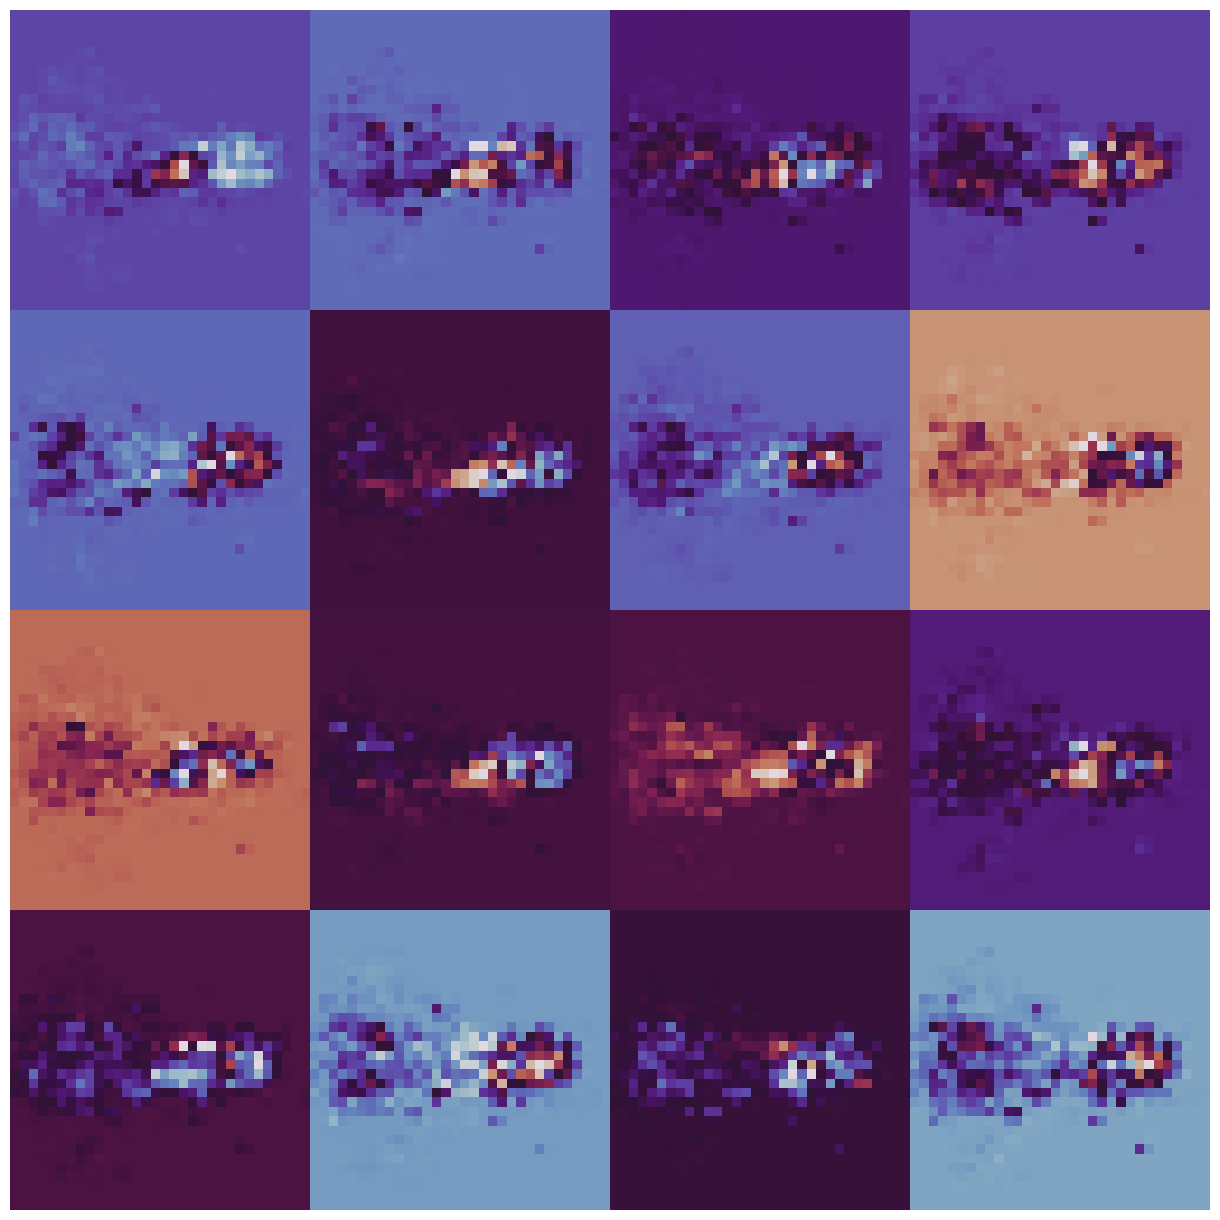

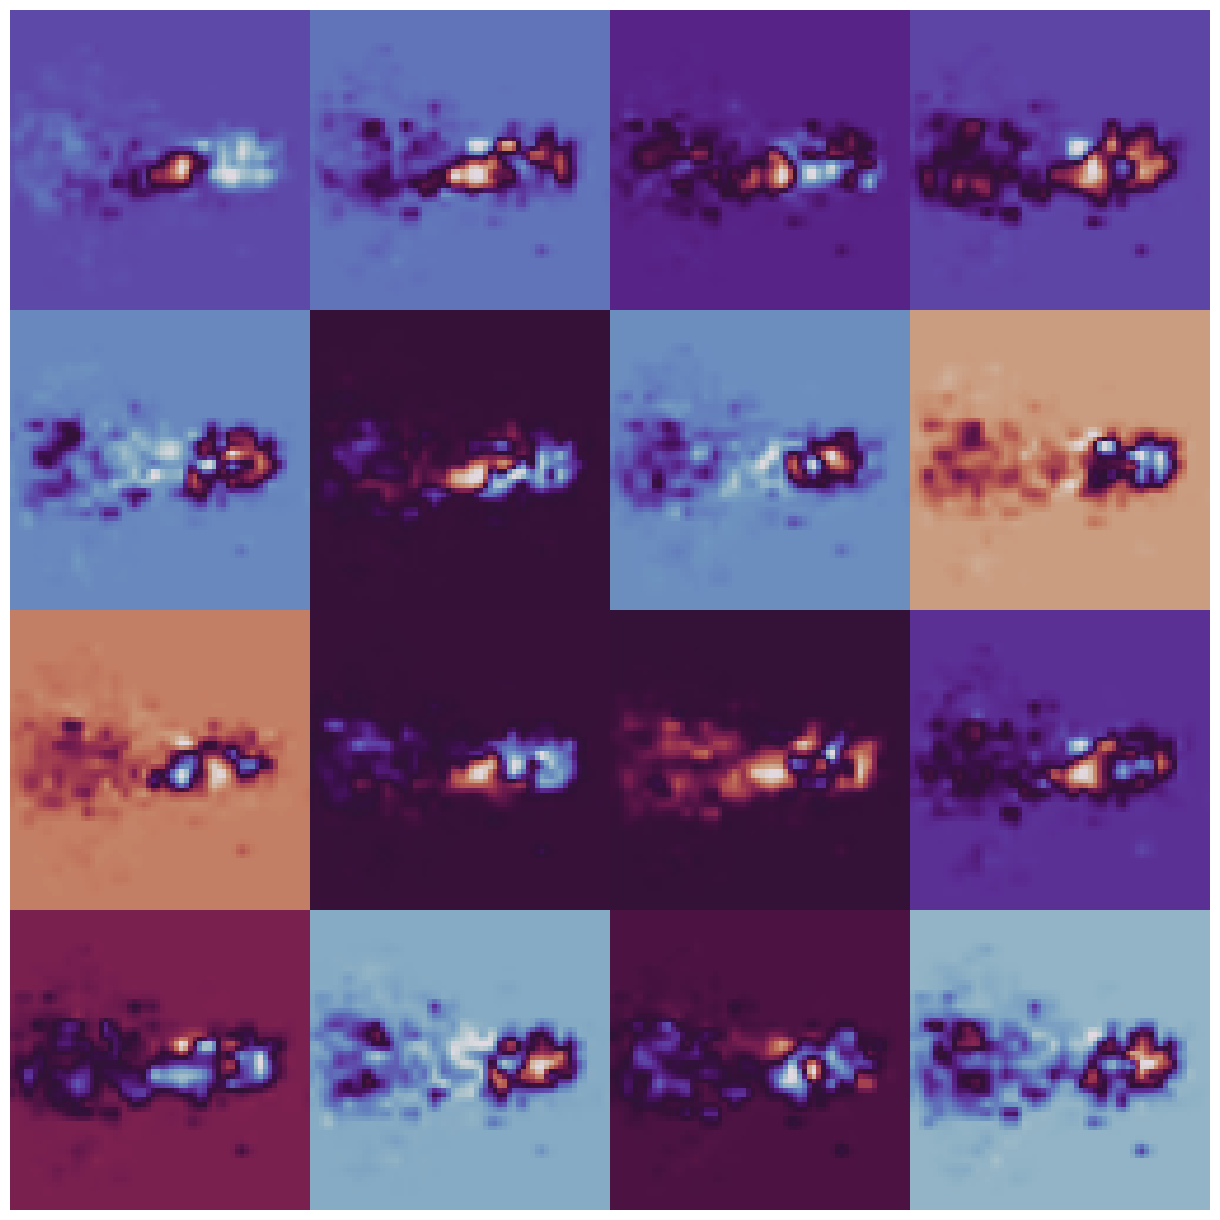

: 

In [25]:
import itertools
import logging as log
from typing import Optional, Union, List, Dict, Sequence, Iterable, Collection, Callable

import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
sys.path.append("./thirdparty/gaussian_splatting")

from thirdparty.gaussian_splatting.scene import Scene
from thirdparty.gaussian_splatting.scene.hexplane import HexPlaneField



bounds = 1.6
kplanes_config = {
                        'grid_dimensions': 2,
                        'input_coordinate_dim': 4,
                        'output_coordinate_dim': 16,
                        'resolution': [32, 32, 32, 50]
                    }
multires = [1]

fine_kplanes_config = {
                        'grid_dimensions': 2,
                        'input_coordinate_dim': 4,
                        'output_coordinate_dim': 16,
                        'resolution': [64, 64, 64, 150]
                    }
fine_multires = [1]

path = "log/coffee/coarse2fine_test/point_cloud/iteration_3000.pth"
(data,iter) = torch.load(path)
# # (_,_) =data
# print(data[0])
# print(data[1])
old_plane = HexPlaneField(1.6,kplanes_config, multires)
old_plane=data[16]
print(old_plane.aabb)
new_plane = HexPlaneField(bounds,fine_kplanes_config, fine_multires)
new_plane.set_aabb(np.array([173,120,347]),np.array([-80,-118,0]),300)

# new_grid={}
# for grid_id1 in range(2):
#     for grid_id2 in range(6):
#         new_grid[f"grid{grid_id1}{grid_id2}"] = None

for fb,grids in enumerate(new_plane.grids):
    coo_combs = list(itertools.combinations(
range(4), 2))
    for idx,grid in enumerate(grids):
        print(coo_combs[idx])
        x,y = coo_combs[idx]
        (_,outdim,H,W) = grid.shape
    #1.生成新的点的坐标
        # grid_y, grid_x = torch.meshgrid(
        # torch.linspace(-1, 1, H),
        # torch.linspace(-1, 1, W)
        # )
        # grid_y = grid_y.reshape(-1,H*W)
        # grid_x = grid_x.reshape(-1,H*W)
        
        x_max,x_min = new_plane.aabb[0][x],new_plane.aabb[1][x]
        x_max = (x_max-old_plane.aabb[1][x])*2/(old_plane.aabb[0][x]-old_plane.aabb[1][x]) -1.0
        x_min = (x_min-old_plane.aabb[1][x])*2/(old_plane.aabb[0][x]-old_plane.aabb[1][x]) -1.0
        if 3 in coo_combs[idx]:
            y_max,y_min = 1,-1
        else:
            y_max,y_min = new_plane.aabb[0][y],new_plane.aabb[1][y]
            y_max = (y_max-old_plane.aabb[1][y])*2/(old_plane.aabb[0][y]-old_plane.aabb[1][y]) -1.0
            y_min = (y_min-old_plane.aabb[1][y])*2/(old_plane.aabb[0][y]-old_plane.aabb[1][y]) -1.0

        grid_y,grid_x = torch.meshgrid(
            torch.linspace(y_min,y_max,H),
            torch.linspace(x_min,x_max,W)
        )
        print(grid_x)
        grid = torch.cat((grid_x.unsqueeze(-1),grid_y.unsqueeze(-1)),dim=-1).unsqueeze(0).to("cuda")
        print(grid.shape)
        features = F.grid_sample(old_plane.grids[fb][idx],grid,mode='bilinear',align_corners=True)
        print(features.device)
        new_plane.grids[fb][idx] = nn.Parameter(features)

visualize_tensor(old_plane.grids[0][0].detach().cpu())
visualize_tensor(new_plane.grids[0][0].detach().cpu())


odict_keys(['aabb', 'grids.0.0', 'grids.0.1', 'grids.0.2', 'grids.0.3', 'grids.0.4', 'grids.0.5', 'grids.1.0', 'grids.1.1', 'grids.1.2', 'grids.1.3', 'grids.1.4', 'grids.1.5'])
grid00 torch.Size([1, 16, 64, 64])
grid01 torch.Size([1, 16, 64, 64])
grid02 torch.Size([1, 16, 75, 64])
grid03 torch.Size([1, 16, 64, 64])
grid04 torch.Size([1, 16, 75, 64])
grid05 torch.Size([1, 16, 75, 64])
grid10 torch.Size([1, 16, 128, 128])
grid11 torch.Size([1, 16, 128, 128])
grid12 torch.Size([1, 16, 75, 128])
grid13 torch.Size([1, 16, 128, 128])
grid14 torch.Size([1, 16, 75, 128])
grid15 torch.Size([1, 16, 75, 128])


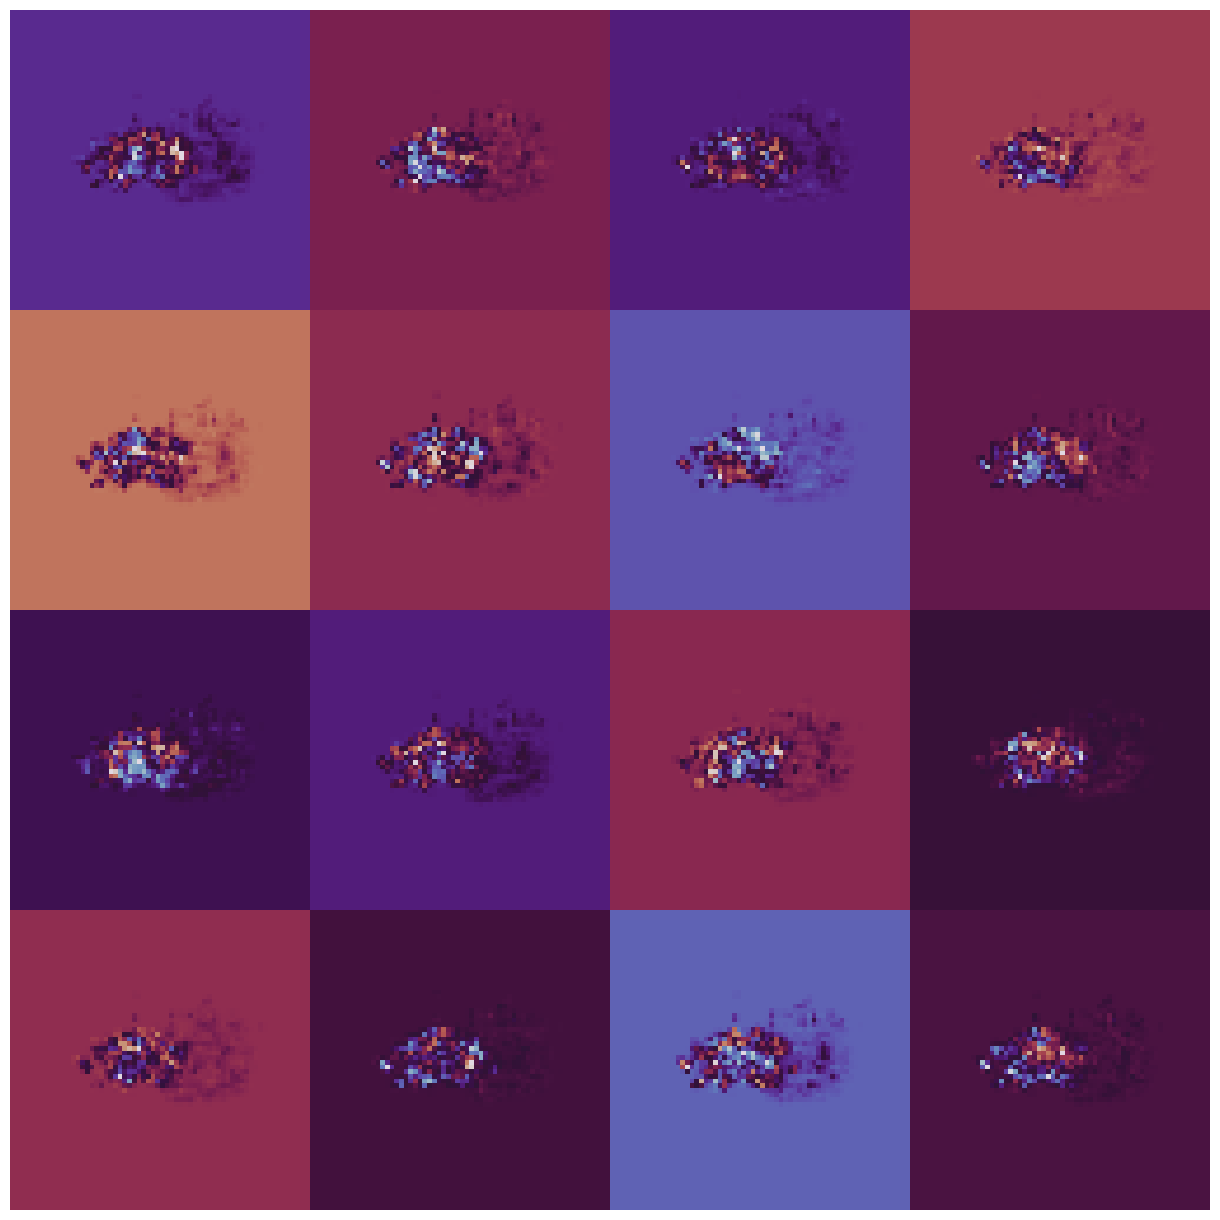

tensor(0.6794, device='cuda:0')


In [9]:
import torch
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
sys.path.append("./thirdparty/gaussian_splatting")
# from thirdparty.gaussian_splatting.utils.system_utils import mkdir_p
# from thirdparty.gaussian_splatting.utils.loss_utils import l1_loss, ssim, l2_loss, rel_loss,msssim
# from thirdparty.gaussian_splatting.utils.image_utils import psnr,easy_cmap
# from helper_train import getrenderpip, getmodel, getloss, controlgaussians, reloadhelper, trbfunction
from thirdparty.gaussian_splatting.scene import Scene
path = "log/coffee/hexplane_t75_nosh_newdata_st_exp4_dstd1e-4_scaleintergral_normintergral_allparamschedule_minscale1f/point_cloud/iteration_30000.pth"
(data,iter) = torch.load(path)
# # (_,_) =data
# print(data[0])
# print(data[1])
data=data[15]
hexplane_data = data.state_dict()
# self.hexplane.load_state_dict({k.replace('hexplane_', ''): v for k, v in mlp_state_dict['hexplane_state_dict'].items()})
# hexplane_data = data['hexplane']
print(hexplane_data.keys())
grid_value = {}
for grid_id1 in range(2):
    for grid_id2 in range(6):
        grid_value[f"grid{grid_id1}{grid_id2}"] = hexplane_data[f'grids.{grid_id1}.{grid_id2}']
        print(f"grid{grid_id1}{grid_id2}",hexplane_data[f'grids.{grid_id1}.{grid_id2}'].shape)
def visualize_tensor(tensor):
    # 假设 batch size 为 1，移除 batch 维度
    tensor = tensor.squeeze(0)

    # 确保有 16 个通道
    assert tensor.size(0) == 16

    # 设置画布大小
    plt.figure(figsize=(15, 15))

    # 创建 4x4 的 GridSpec 网格
    gs = gridspec.GridSpec(4, 4)

    for i in range(tensor.size(0)):
        # 为每个通道的图像创建子图
        if i >=16:break
        ax = plt.subplot(gs[i])
        
        # 显示图像
        ax.imshow(tensor[i], cmap='twilight')
        ax.axis('off')
    
    # 调整子图布局
    plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0, hspace=0)
    plt.show()

visualize_tensor(grid_value[f"grid00"].cpu()) #01是xy平面
print(grid_value[f"grid01"].squeeze(0)[0].max())



### visualize_motion

In [56]:
from plyfile import PlyData, PlyElement
import numpy as np
path = path = "log/coffee/flow_mlp_hexplane_motion/point_cloud/iteration_2000/point_cloud.ply"
plydata = PlyData.read(path)
nummotion = 16 #motion的维度
# motion = np.zeros((xyz.shape[0], nummotion))
# motion_fourier = np.zeros((xyz.shape[0], nummotion_fourier))
motion =[]
for i in range(nummotion):
    motion.append(np.asarray(plydata.elements[0]["motion_"+str(i)]))
motion = np.column_stack(motion)
print(motion.shape)
print(motion.max())

(407435, 16)
0.21922477


# eval mssim dssim

In [ ]:
from pytorch_msssim import ms_ssim
import torchvision.transforms.functional as tf
from tqdm import import tqdm
import torch
from PIL import Image
import os
def readImages(renders_dir, gt_dir):
    renders = []
    gts = []
    image_names = []
    for fname in os.listdir(renders_dir):
        render = Image.open(os.path.join(renders_dir , fname))
        gt = Image.open(os.path.join(gt_dir ,fname))
        renders.append(tf.to_tensor(render).unsqueeze(0)[:, :3, :, :].cuda())
        gts.append(tf.to_tensor(gt).unsqueeze(0)[:, :3, :, :].cuda())
        image_names.append(fname)
    return renders, gts, image_names

# base_dir = "log/coffee/notschedule_scalrereg8e-6_prealxyzf10k_d10k_allnoinf10k_hexdim32/d5k/test/ours_27500" #0.9589528 0.0205236
# base_dir ="log/beef/test/test/ours_10000/" #0.9789370 0.0105315
# base_dir="log/cook_spinach/notschedule_scalrereg8e-6_prealxyzf5k_d5k_allnoinf5k_hexdim32/test/ours_13500/" 0.9769556 0.0115222
# base_dir ="log/flame_salmon/notschedule_scalereg8e-6_prealxyzf10k_d10k_hexdim16_1024256_scalenointerf10k/test/ours_30000"#0.9577256 0.0211372
# base_dir="log/flame_steak/notschedule_scalereg8e-6_prealxyzf5k_d5k_nosintf5k_hexdim32/d5k_allnointergral/test/ours_7500/"#0.9801780 0.0099110
base_dir="log/sear_steak/notschedule_scalrereg8e-6_prealxyzf5k_d5k_allnoinf5k_hexdim32/test/ours_5500" #0.9800104 0.0099948
renders_dir=os.path.join(base_dir,"renders_xyz")
gt_dir = os.path.join(base_dir,"gt")

renders, gts, image_names = readImages(renders_dir, gt_dir)

# ssims = []
# psnrs = []
# lpipss = []
# lpipsa = []
ms_ssims = []
Dssims = []
for idx in tqdm(range(len(renders)), desc="Metric evaluation progress"):
    # ssims.append(ssim(renders[idx], gts[idx]))
    # psnrs.append(psnr(renders[idx], gts[idx]))
    # lpipss.append(lpips(renders[idx], gts[idx], net_type='vgg'))
    ms_ssims.append(ms_ssim(renders[idx], gts[idx],data_range=1, size_average=True ))
    # lpipsa.append(lpips(renders[idx], gts[idx], net_type='alex'))
    Dssims.append((1-ms_ssims[-1])/2)

# print("Scene: ", scene_dir,  "SSIM : {:>12.7f}".format(torch.tensor(ssims).mean(), ".5"))
# print("Scene: ", scene_dir,  "PSNR : {:>12.7f}".format(torch.tensor(psnrs).mean(), ".5"))
# print("Scene: ", scene_dir,  "LPIPS-vgg: {:>12.7f}".format(torch.tensor(lpipss).mean(), ".5"))
# print("Scene: ", scene_dir,  "LPIPS-alex: {:>12.7f}".format(torch.tensor(lpipsa).mean(), ".5"))
print(  "MS-SSIM: {:>12.7f}".format(torch.tensor(ms_ssims).mean(), ".5"))
print(  "D-SSIM: {:>12.7f}".format(torch.tensor(Dssims).mean(), ".5"))
